In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\User\\Downloads\\film\\Solar-Radiation-Measurement\\notebooks\\new_data_sets\\cleaned_data_for_togo-dapaong_qc.csv")

In [3]:
df.head()

,Unnamed: 0,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,0,2021-10-25 00:01,1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,1,2021-10-25 00:02,1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2,2021-10-25 00:03,1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,3,2021-10-25 00:04,1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,4,2021-10-25 00:05,1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


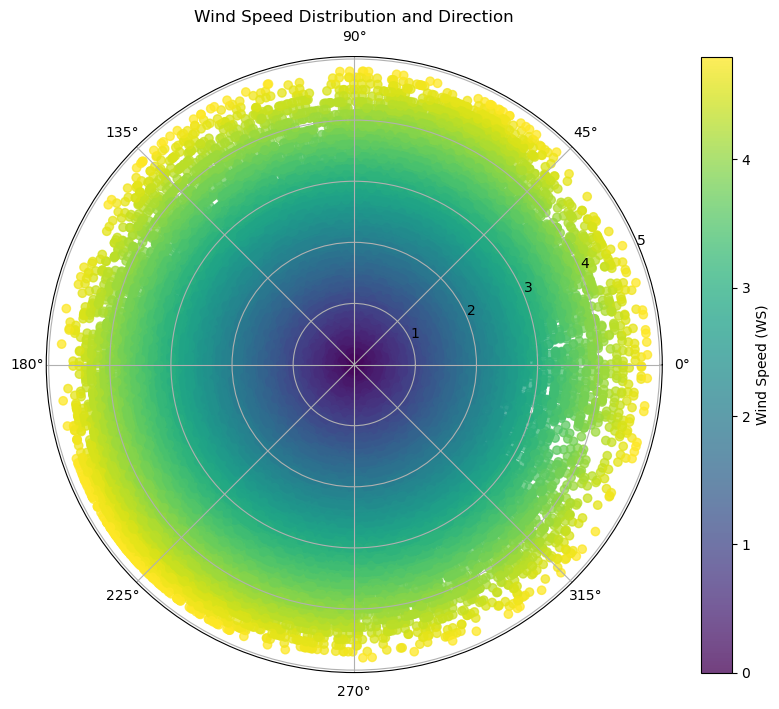

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')
wind_data = df[['WS', 'WD']].dropna() 
wind_direction_rad = np.deg2rad(wind_data['WD'])
sc = ax.scatter(wind_direction_rad, wind_data['WS'], c=wind_data['WS'], cmap='viridis', alpha=0.75)
plt.colorbar(sc, label='Wind Speed (WS)')
ax.set_title('Wind Speed Distribution and Direction')
plt.show()
plt.savefig("togo wind speed.png")

In [8]:
temperature_humidity_data = df[['RH', 'TModA', 'TModB', 'GHI']].dropna()

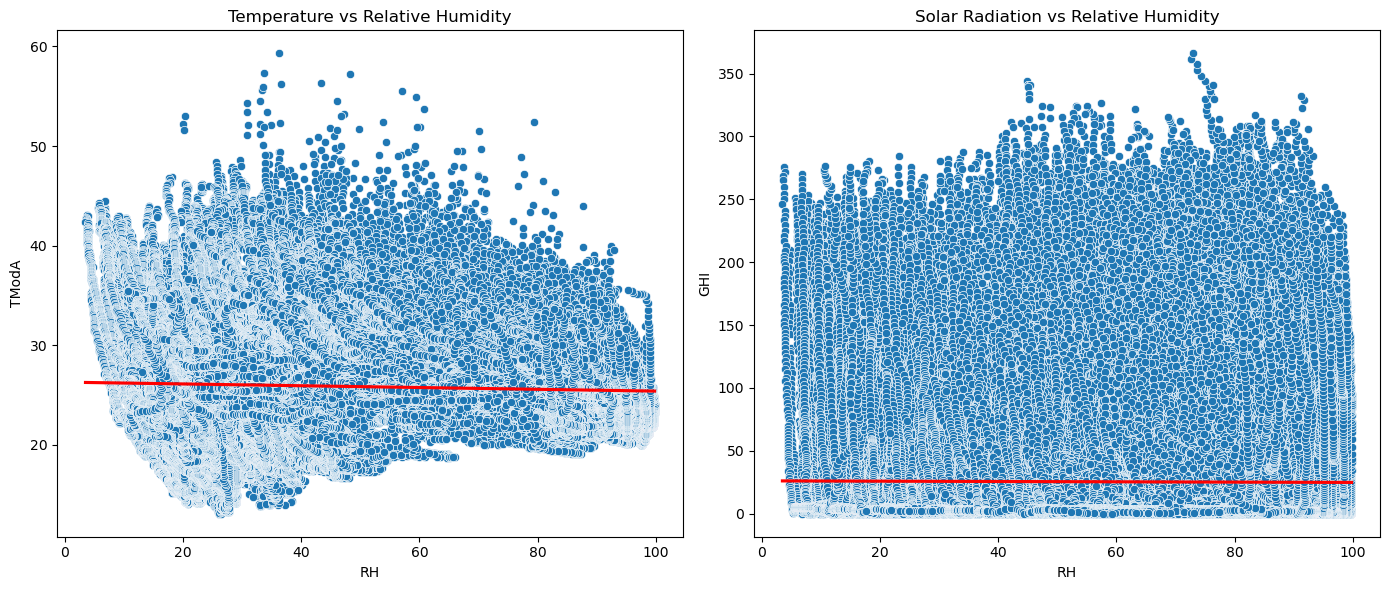

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(14, 6))

# Plot Temperature vs Relative Humidity
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='TModA', data=temperature_humidity_data)
sns.regplot(x='RH', y='TModA', data=temperature_humidity_data, scatter=False, color='r')
plt.title('Temperature vs Relative Humidity')

# Plot Solar Radiation vs Relative Humidity
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=temperature_humidity_data)
sns.regplot(x='RH', y='GHI', data=temperature_humidity_data, scatter=False, color='r')
plt.title('Solar Radiation vs Relative Humidity')

plt.tight_layout()
plt.show()
plt.savefig(" togo Temperature vs Relative Humidity and Plot Solar Radiation vs Relative Humidity.png")

In [10]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

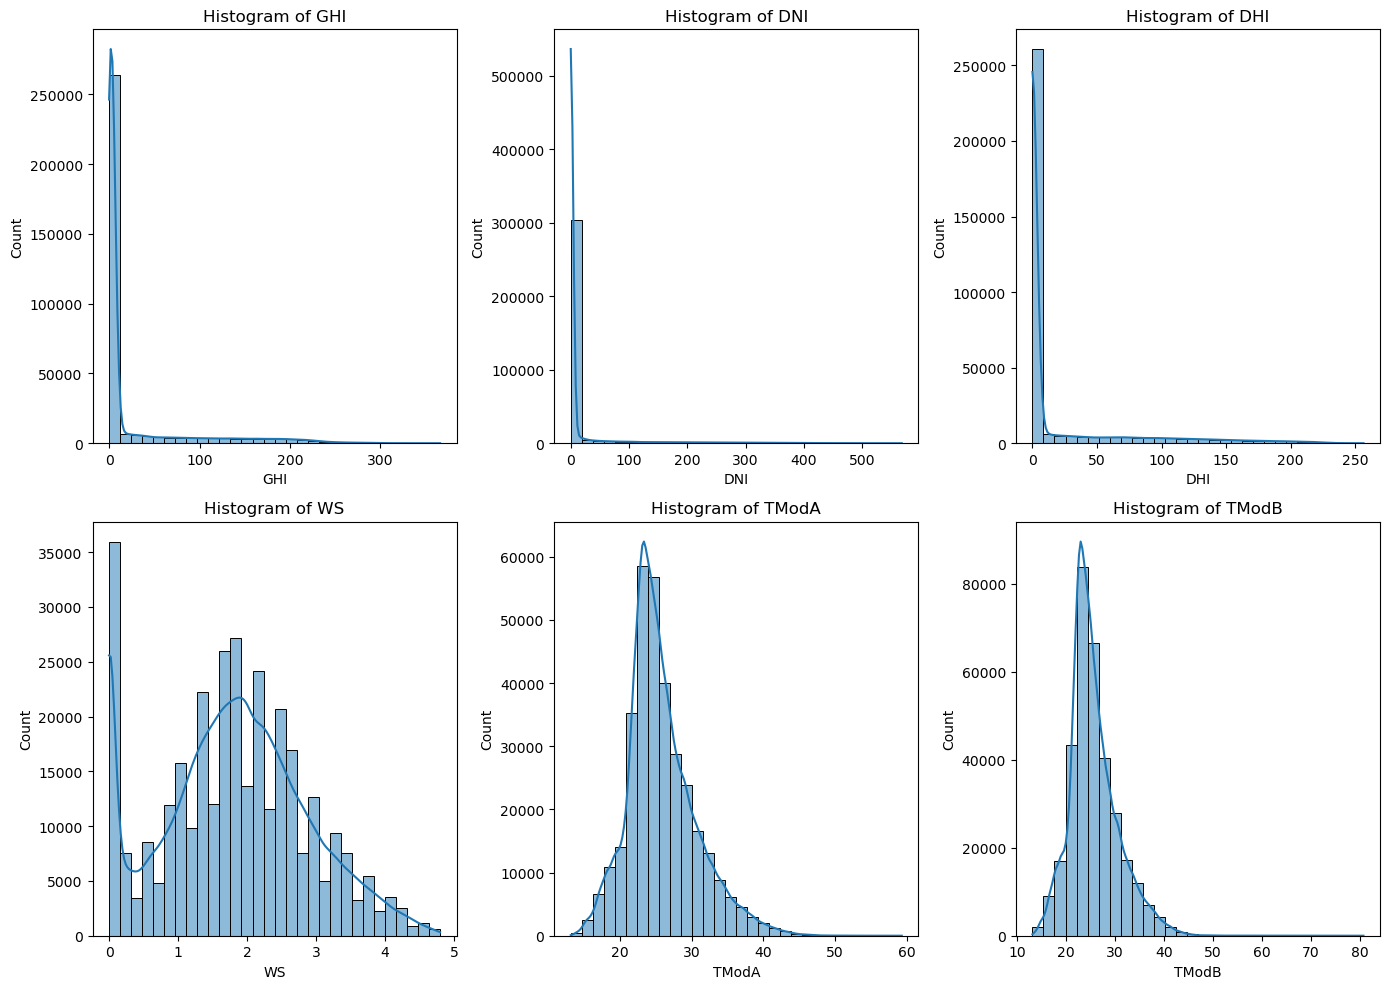

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(14, 10))

# Create histograms for each variable
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var].dropna(), bins=30, kde=True)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()
plt.savefig("togo histogram.png")